## **Homework 1** Problem 1

In [32]:
%matplotlib inline

In [33]:
!nvidia-smi

Fri Oct 15 05:34:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.11       Driver Version: 471.11       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:07:00.0  On |                  N/A |
| 60%   36C    P8     8W / 100W |    838MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from Canvas and put into your Google Drive.
Mount your Google Drive to this notebook.

In [34]:
##mounting google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

Load MNIST dataset from your Google Drive. 

In [35]:
from scipy.io import loadmat
# mnist = loadmat('/content/gdrive/My Drive/CV2HW/mnist.mat')
mnist = loadmat('mnist.mat')

# loading data and splitting to train,validation and test sets
traindata = mnist['traindata'][:50000]
trainlabels = mnist['trainlabels'].ravel()[:50000]
validdata = mnist['traindata'][50000:]
validlabels = mnist['trainlabels'].ravel()[50000:]
testdata = mnist['testdata']
testlabels=mnist['testlabels'].ravel()
print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

#giving alias to train,validation and test data


(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)


The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

Visualize an image with label.

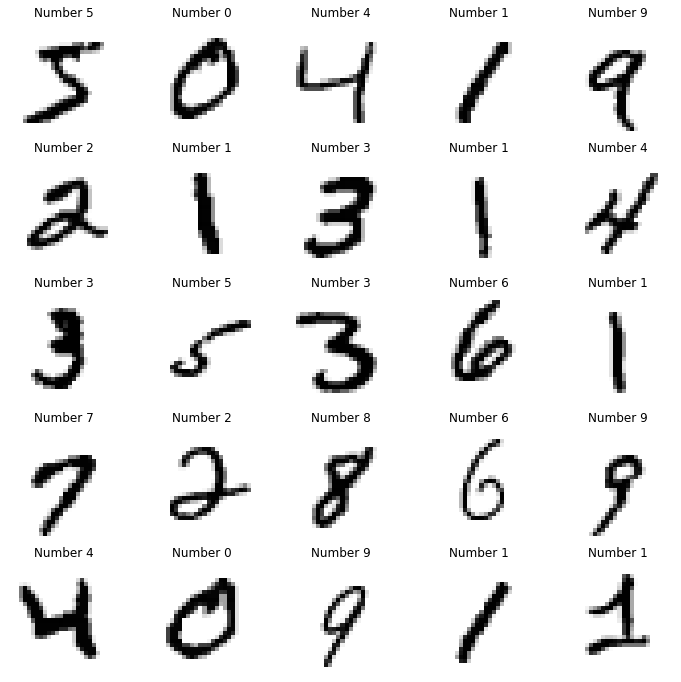

In [36]:
#visualising mnist data
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA

Implement PCA on the whole MNIST dataset and reduce the data dimension from 784 to a smaller value. 

here, standardscalar is used to standardise the data fed into PCA

In [37]:
from sklearn.preprocessing import StandardScaler

x_train = mnist['traindata'][:50000]
y_train = mnist['trainlabels'][:50000]
x_val = mnist['traindata'][50000:]
y_val = mnist['trainlabels'][50000:]
testdata = mnist['testdata']
testlabels=mnist['testlabels'].ravel()

scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_val_std=scaler.transform(x_val)
x_train_std.shape

(50000, 784)

Implementing PCA

In [38]:
from sklearn.decomposition import PCA
pca=PCA(.8) # taking data that accounts to 80 percent of variance
x_train_pca = pca.fit_transform(x_train_std) #fitting PCA and transformin x_train
x_val_pca=pca.transform(x_val_std) #transforming x_test
x_train_pca.shape


(50000, 148)

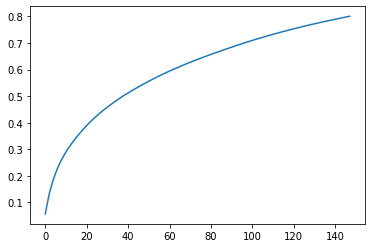

In [39]:
import numpy as np
plt.plot(range(148),np.cumsum(pca.explained_variance_ratio_))


We can see that 80 percent of the information is contained in 144 input features

**Please type your answers for the discussion questions here.**

## **Homework 1** Problem 2

### (a) $k$-Nearest Neighbor Classifier (Supervised Learning)

Implement the $k$-nearest neighbor classifier with Euclidean distance on the MNIST dataset.


In [40]:
from sklearn.neighbors import KNeighborsClassifier
def knn(traindata, trainlabels, testdata, k=1,n_jobs=-1):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(traindata,trainlabels)
  preds=model.predict(testdata)
  return preds

Evaluate the performance by classification accuracy on validation set with different number of training data.

### KNN on raw data

In [41]:
import random
from sklearn.metrics import accuracy_score

n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
raw_accuracies=[]
for n_sel in n_entries:
  print(n_sel)
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  y_pred=knn(traindata[sel], trainlabels[sel].ravel(), validdata, 1)
  acc_score=accuracy_score(validlabels,y_pred)
  raw_accuracies.append(acc_score)
print("accuracies for n=",n_entries," are",raw_accuracies)

1000
2000
5000
10000
20000
50000
accuracies for n= [1000, 2000, 5000, 10000, 20000, 50000]  are [0.8862, 0.914, 0.9379, 0.9515, 0.962, 0.9712]


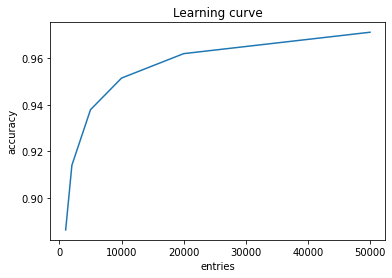

In [42]:
plt.xlabel("entries")
plt.ylabel("accuracy")
plt.title("Learning curve")
plt.plot(n_entries,raw_accuracies)

Evaluate the classification accuracy with different hyperparamter $k$.

In [43]:
import random

k_accuracies=dict()
k_list=range(1,25)
for k in k_list:
  y_pred=knn(traindata, trainlabels.ravel(), validdata, k)
  print(k,end=" , ")
  
  # TODO: evaluate classification accuracy
  acc_score=accuracy_score(validlabels,y_pred)
  k_accuracies[k]=acc_score
max_k = max(k_accuracies, key=k_accuracies.get)
print("after hyperparameter tuning, best performance is given by k={}".format(max_k))

1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , after hyperparameter tuning, best performance is given by k=4


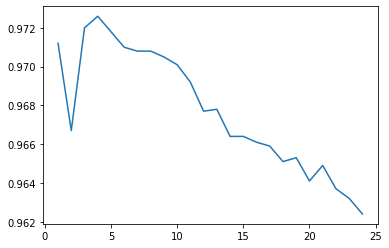

In [44]:

plt.plot(k_list,list(k_accuracies.values()))


### KMeans Using PCA data

In [45]:
# KMeans using PCA data
import random
n_entries = [1000, 2000, 5000, 10000, 20000, 50000]
pca_accuracies=[]
for n_sel in n_entries:
  # randomly select training entries
  sel = random.sample(range(50000), n_sel)
  y_pred=knn(x_train_pca[sel], y_train[sel].ravel(), x_val_pca, 1)
  acc_score=accuracy_score(y_val,y_pred)
  pca_accuracies.append(acc_score)

pca_accuracies

[0.8552, 0.8974, 0.9183, 0.9332, 0.9462, 0.9561]

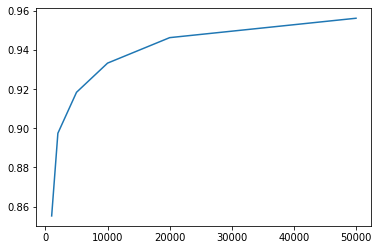

In [46]:
plt.plot(n_entries,pca_accuracies)


Evaluate the classification accuracy with different hyperparamter $k$.

In [47]:
import random

k_accuracies=dict()
k_list=range(1,25)
for k in k_list:
  y_pred=knn(x_train_pca, y_train.ravel(), x_val_pca, k)
  print(k,end=" , ")
  
  # TODO: evaluate classification accuracy
  acc_score=accuracy_score(y_val,y_pred)
  k_accuracies[k]=acc_score
max_k = max(k_accuracies, key=k_accuracies.get)
print("after hyperparameter tuning, best performance is given by k={}".format(max_k))

1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , after hyperparameter tuning, best performance is given by k=3


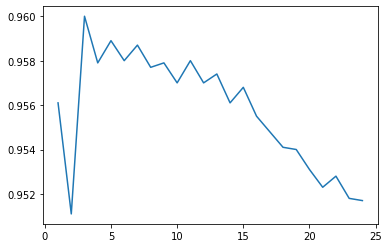

In [48]:

plt.plot(k_list,list(k_accuracies.values()))


### Running classifier on test set

In [49]:
import random
y_test=testlabels
x_test_pca=pca.transform(testdata)
k_accuracies=dict()
k_list=range(1,25)
for k in k_list:
  y_pred=knn(x_train_pca, y_train.ravel(), x_test, k)
  print(k,end=" , ")
  
  # TODO: evaluate classification accuracy
  acc_score=accuracy_score(y_test,y_pred)
  k_accuracies[k]=acc_score
max_k = max(k_accuracies, key=k_accuracies.get)
print("after hyperparameter tuning, best performance is given by k={} and accuracy is {}".format(max_k,k_accuracies[max_k]))

1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , after hyperparameter tuning, best performance is given by k=23 and accuracy is 0.8236


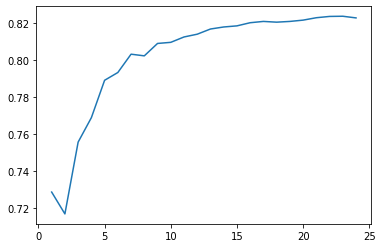

In [50]:
plt.plot(k_list,list(k_accuracies.values()))


**Please type your answers for the discussion questions here.**

### (b) $k$-means Clustering (Unsupervised Learning)

Implement $k$-Means clustering algorithm and report classification accuracies.

In [51]:
clusters = 10
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters =clusters , n_init = 35)
# TODO: fit kmeans model
k_means.fit(x_train)
# TODO: show real digit distribution in each cluster
print(k_means.n_iter_)
k_means_labels = k_means.labels_



77


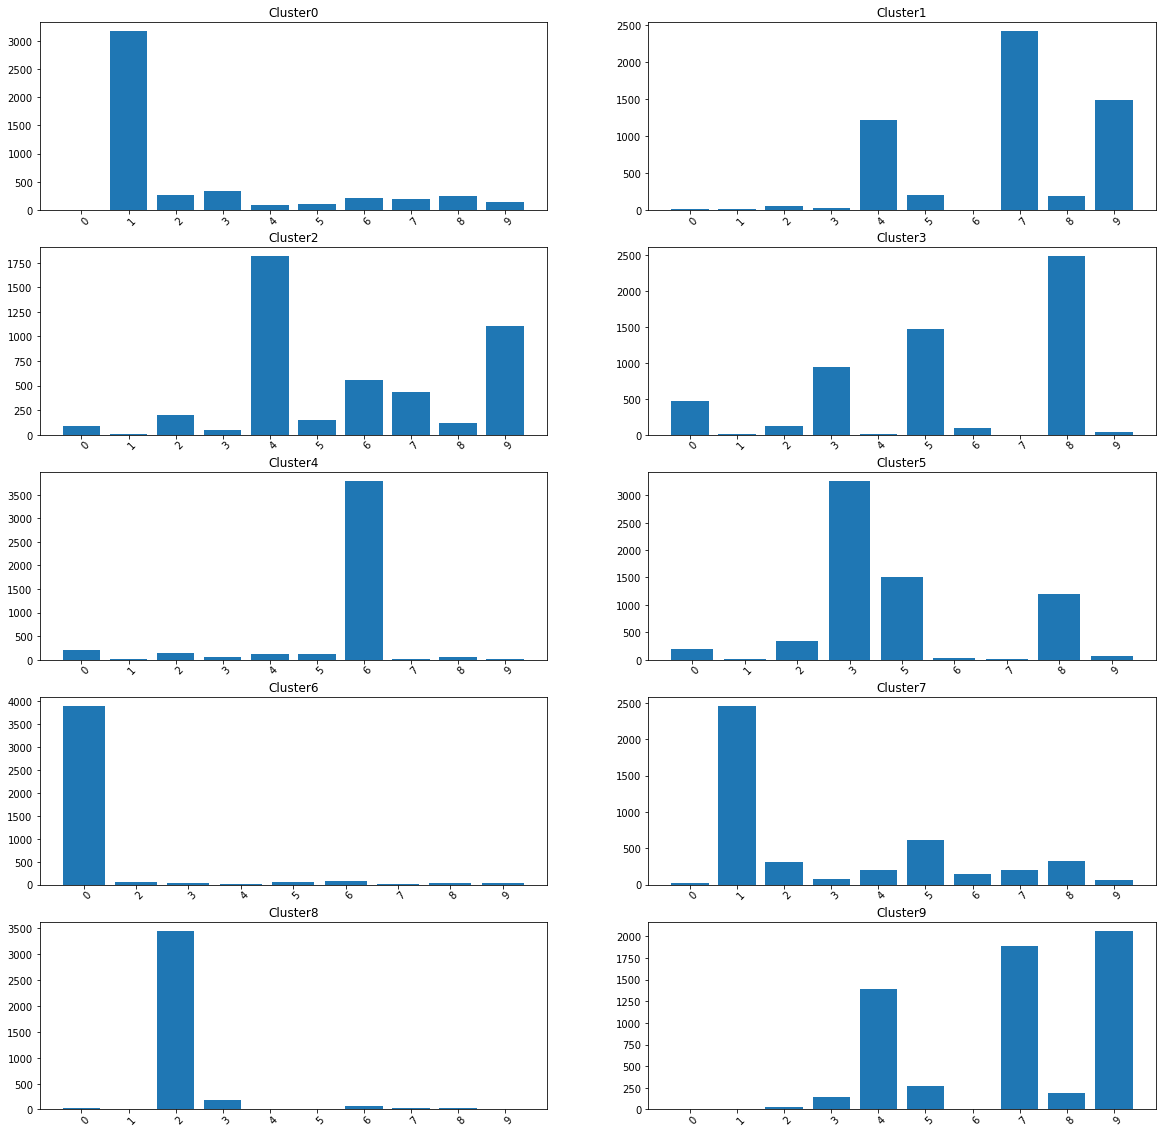

In [52]:
# code from referemce : https://github.com/sunman91/Data-Science-stuff/blob/master/k-means-and-pca-on-f-mnist-dataset.ipynb
class_names = {0:'0', 1:'1',2: '2',3: '3',4: '4',5:
               '5',6: '6', 7:'7',8:  '8',9: '9'} #Dictionary of class names
G = len(np.unique(k_means_labels)) #Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = trainlabels[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation
#counts the number of each category in each cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain category in cluster 1
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

K is even when k is 10. since we have to find nearest neighbors in any case, there would be ties when k is even. So it is better for k to be odd for getting proper results.
K is usually set as k=sqrt(n) where n is number of classes and 10 in this case

Infer $k$-Means results on the testing set. Evaluate performance.

In [54]:
import random
y_test=testlabels
x_test_pca=pca.transform(testdata)
k_accuracies=dict()
# k_list=range(1,25)
k=9


k_means = KMeans(init = "k-means++", n_clusters =k , n_init = 35)
k_means.fit(x_train_pca)
y_pred=k_means.predict(x_test_pca)
# TODO: evaluate classification accuracy
acc_score=accuracy_score(y_test,y_pred)
k_accuracies[k]=acc_score

max_k = max(k_accuracies, key=k_accuracies.get)
print(" performance is given by k={} and accuracy is {}".format(max_k,k_accuracies[max_k]))

 performance is given by k=9 and accuracy is 0.1597


accuracy is given and is very low because the clusters are not mapped

In [55]:
actual_clusters={0:1,1:7,2:4,3:8,4:6,5:3,6:0,7:1,8:2,9:9}

In [58]:
y_new=[]
for i in y_pred:
    y_new.append(actual_clusters[i])
acc_score=accuracy_score(y_test,y_new)
acc_score

0.0512

**Please type your answers for the discussion questions here.**

### (c) Discussion

**Please type your answers for the discussion questions here.**

#### Supervised vs Unsupervised

•	Supervised Machine Learning is used when the ground truth is known.
•	Needs large amount of data to learn the relationship between them as weights in a matrix and then use these relations to find where the new incoming data fits or predict where the new datapoint would be. 
•	Since we know the ground truth, the model predicts the outcome and is able to give an accuracy score.
•	Eg: decision tree, random forest
•	Regression and classification are some of the supervised machine learning techniques.


•	Unsupervised machine learning is used when ground truth is not known
•	Eg: clustering, k means clustering, knn clustering
•	A group of seemingly similar data is fed into an unsupervised machine learning algorithm and the model groups related dsata together into clusters. Based on these clusters, a new incoming data is put into one cluster. This can be used for anomaly detection, grouping etc. For classification, labels need to be put for groups after clustering.


#### How to choose hyperparameters of ML algorithm

Different hyper parameters needs to be checked in succession or in parallel to do hyperparameter tuning. An example of this is gridsearchcv, which is a library in scikit learn that accepts parameters as lists and allows us to apply multipple parameters and take the one which reduces the loss or increases teh f1 score or as we set in the function. <br>
This makes searching for hyperparameters very easy. <br>
Note: Different models have different hyperparameters and the documentation should be checked to know what all parameters can be given